**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)

txt_fname = paste("List", "data_region", "cluster_vs_others.rds", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fname)

###
obj = readRDS(txt_fpath)
lst_dat_region = obj

[1] "List.data_region.cluster_vs_others.rds"


In [3]:
lst = lst_dat_region
names(lst)

[1] "Cluster00" "Cluster01" "Cluster02" "Cluster03" "Cluster04" "Cluster05"
 [7] "Cluster06" "Cluster07" "Cluster08" "Cluster09" "Cluster10" "Cluster11"
[13] "Cluster12" "Cluster13" "Cluster14"

In [4]:
lst = lst_dat_region
dat = lst[[1]]
head(dat)

,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,⋯,ZSCAN29,ZSCAN32,ZZZ3,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR,Group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1:100036895-100039189,2.899574,3.910099,0.4091536,1.1978119,1.0698812,4.947811,5.521968,4.177296,4.663171,0.9431997,⋯,1.2491389,1.045114,1.0331657,1.7130117,-0.05130039,0,1.8327506,0,2.2235590,1
chr1:100132375-100133491,3.511342,3.432175,0.3423994,0.7661698,0.6115988,4.537458,5.160366,2.783096,4.025729,0.8828316,⋯,1.3442036,1.306595,1.3040379,2.9306840,-1.54124905,0,0.7916420,0,2.5331675,1
chr1:100265562-100266994,3.496910,3.284969,0.5231208,1.0643310,1.2245651,4.710806,5.403491,3.499795,4.206733,0.8527460,⋯,1.2172866,1.263143,1.1292962,1.1934266,0.44626995,0,2.3501627,0,0.9601916,1
chr1:100362769-100363401,1.923438,3.315037,0.3703055,0.8535861,0.9100192,3.980117,3.433015,3.114860,3.647725,1.1960089,⋯,0.9685973,1.581804,1.0400227,0.8588310,-1.29429728,0,1.7541961,0,2.9000051,1
chr1:100894637-100896932,3.745893,3.420307,0.4252643,0.8091650,1.2691259,4.995457,5.381014,2.876085,4.190749,0.9913947,⋯,1.4100317,1.485921,0.9764223,0.6340759,-0.51100562,0,0.8131136,0,0.9066413,1
chr1:10474552-10475672,3.096883,3.117614,0.3434345,0.9645210,1.2675049,4.546691,5.275893,2.925479,3.883244,0.5699994,⋯,1.1466715,1.093391,0.8617688,2.3834213,-0.20210161,0,1.2755376,0,2.0413127,1


In [67]:
fun_plot = function(dat, txt_cluster, txt_feature){
    dat = dat %>% 
        dplyr::mutate(Label = ifelse(Group == 1, txt_cluster, "Others")) %>%
        dplyr::mutate(Label = factor(Label, levels=c(txt_cluster, "Others")))
    dat$Score = dat[,txt_feature]

    txt = paste(txt_cluster, txt_feature, sep=": ")
    gpt = ggplot(dat, aes(x=Label, y=Score)) + 
        geom_boxplot() + 
        theme_cowplot() + 
        background_grid() +
        labs(x="", y="Score", title=txt) +
        theme(
            plot.title   = element_text(size=20),
            axis.title.y = element_text(size=15),
            axis.text.y  = element_text(size=15),
            axis.text.x  = element_text(size=15)
        )
    return(gpt)
}

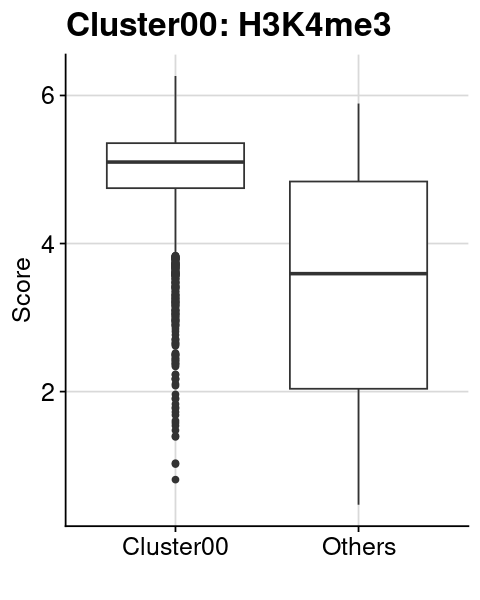

In [68]:
txt_cluster = "Cluster00"
txt_feature = "H3K4me3"
lst = lst_dat_region
dat = lst[[txt_cluster]]
options(repr.plot.height=5, repr.plot.width=4)
fun_plot(dat, txt_cluster, txt_feature)

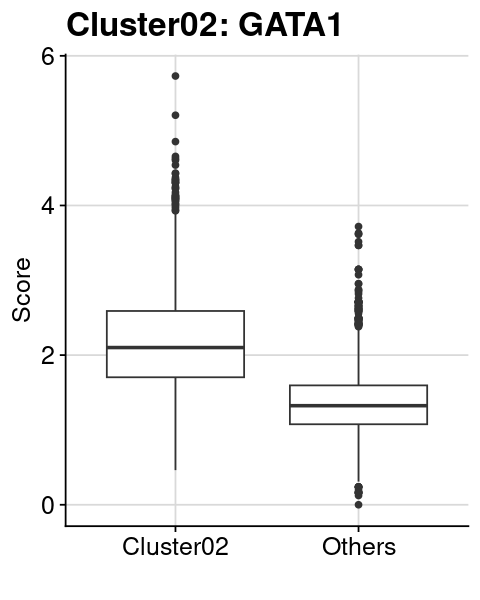

In [69]:
txt_cluster = "Cluster02"
txt_feature = "GATA1"
lst = lst_dat_region
dat = lst[[txt_cluster]]
options(repr.plot.height=5, repr.plot.width=4)
fun_plot(dat, txt_cluster, txt_feature)

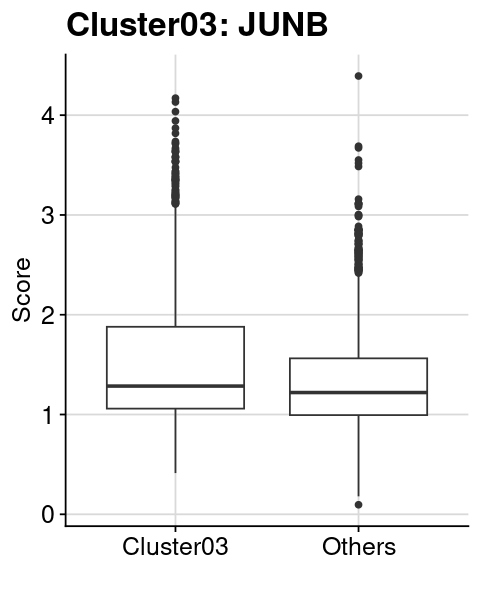

In [70]:
txt_cluster = "Cluster03"
txt_feature = "JUNB"
lst = lst_dat_region
dat = lst[[txt_cluster]]
options(repr.plot.height=5, repr.plot.width=4)
fun_plot(dat, txt_cluster, txt_feature)

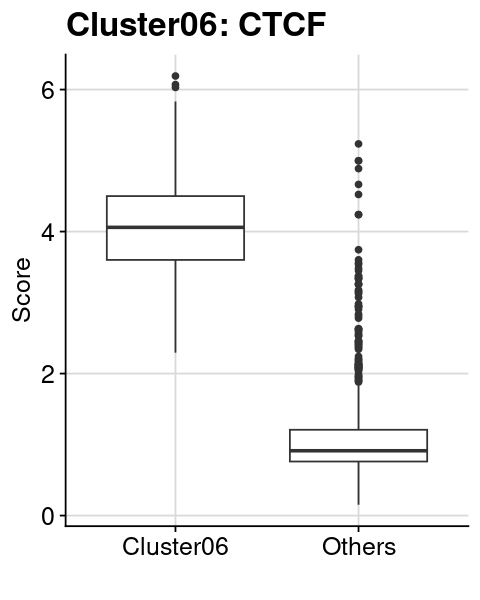

In [71]:
txt_cluster = "Cluster06"
txt_feature = "CTCF"
lst = lst_dat_region
dat = lst[[txt_cluster]]
options(repr.plot.height=5, repr.plot.width=4)
fun_plot(dat, txt_cluster, txt_feature)

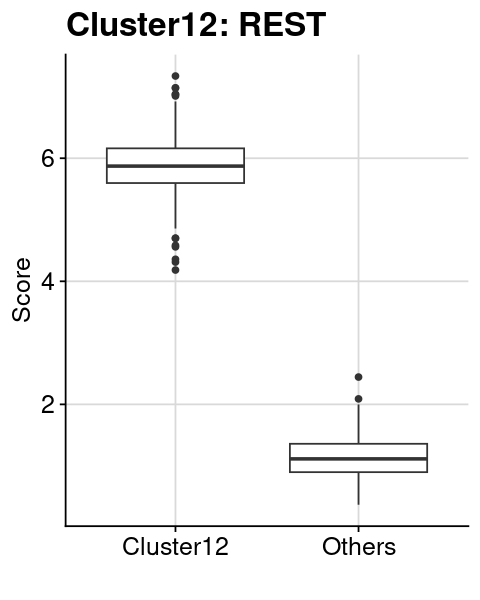

In [72]:
txt_cluster = "Cluster12"
txt_feature = "REST"
lst = lst_dat_region
dat = lst[[txt_cluster]]
options(repr.plot.height=5, repr.plot.width=4)
fun_plot(dat, txt_cluster, txt_feature)

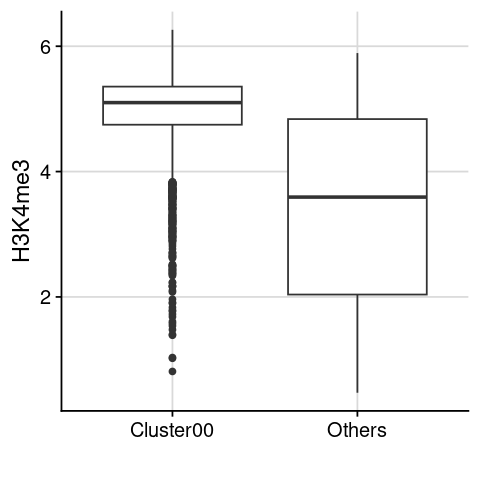

In [28]:
txt_cluster = "Cluster00"
lst = lst_dat_region
dat = lst[[txt_cluster]]
dat = dat %>% 
    dplyr::mutate(Label = ifelse(Group == 1, txt_cluster, "Others")) %>%
    dplyr::mutate(Label = factor(Label, levels=c(txt_cluster, "Others")))

options(repr.plot.height=5, repr.plot.width=4)
gpt = ggplot(dat, aes(x=Label, y=H3K4me3)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    labs(x="", y=)
print(gpt)

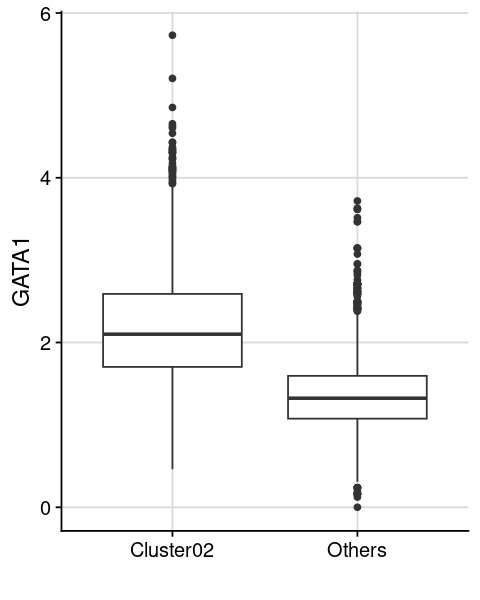

In [27]:
txt_cluster = "Cluster02"
lst = lst_dat_region
dat = lst[[txt_cluster]]
dat = dat %>% 
    dplyr::mutate(Label = ifelse(Group == 1, txt_cluster, "Others")) %>%
    dplyr::mutate(Label = factor(Label, levels=c(txt_cluster, "Others")))

options(repr.plot.height=5, repr.plot.width=4)
gpt = ggplot(dat, aes(x=Label, y=GATA1)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    labs(x="")
print(gpt)

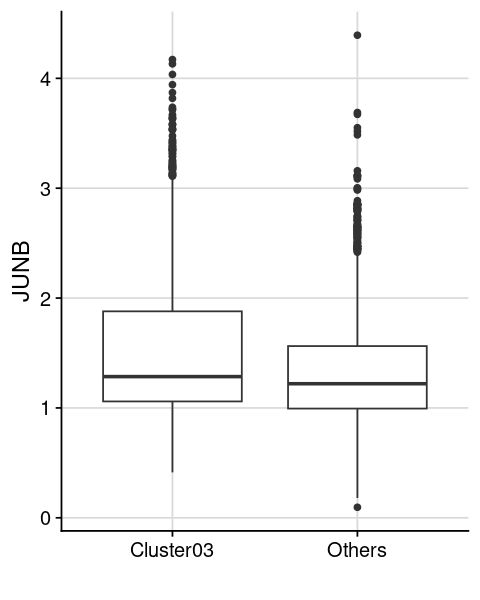

In [25]:
txt_cluster = "Cluster03"
lst = lst_dat_region
dat = lst[[txt_cluster]]
dat = dat %>% 
    dplyr::mutate(Label = ifelse(Group == 1, txt_cluster, "Others")) %>%
    dplyr::mutate(Label = factor(Label, levels=c(txt_cluster, "Others")))

options(repr.plot.height=5, repr.plot.width=4)
gpt = ggplot(dat, aes(x=Label, y=JUNB)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    labs(x="")
print(gpt)

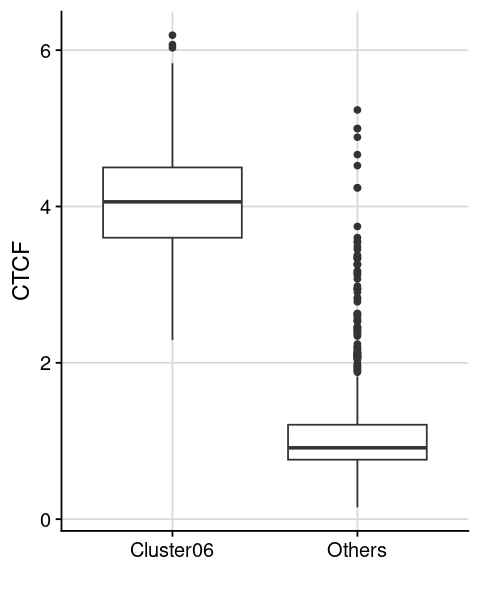

In [18]:
txt_cluster = "Cluster06"
lst = lst_dat_region
dat = lst[[txt_cluster]]
dat = dat %>% 
    dplyr::mutate(Label = ifelse(Group == 1, txt_cluster, "Others")) %>%
    dplyr::mutate(Label = factor(Label, levels=c(txt_cluster, "Others")))

options(repr.plot.height=5, repr.plot.width=4)
gpt = ggplot(dat, aes(x=Label, y=CTCF)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    labs(x="")
print(gpt)

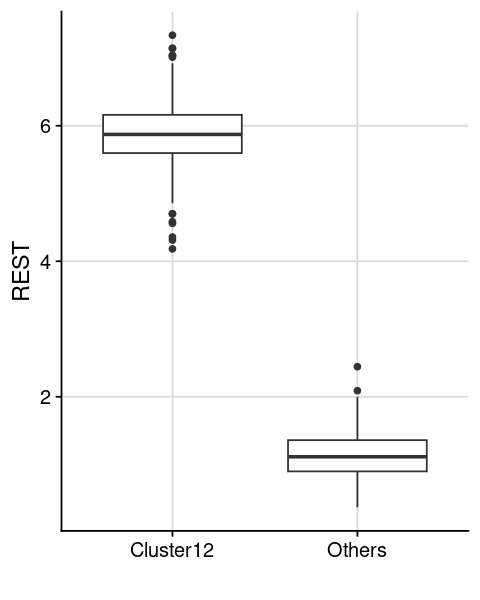

In [20]:
txt_cluster = "Cluster12"
lst = lst_dat_region
dat = lst[[txt_cluster]]
dat = dat %>% 
    dplyr::mutate(Label = ifelse(Group == 1, txt_cluster, "Others")) %>%
    dplyr::mutate(Label = factor(Label, levels=c(txt_cluster, "Others")))

options(repr.plot.height=5, repr.plot.width=4)
gpt = ggplot(dat, aes(x=Label, y=REST)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    labs(x="")
print(gpt)

In [ ]:
lst = lst_dat_region
lst = lapply(lst, funciton(dat){
    dat = dat %>% dplyr::
})